In [ ]:
!pip install opencv-contrib-python --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 MB 2.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.8.0.76
    Uninstalling opencv-contrib-python-4.8.0.76:
      Successfully uninstalled opencv-contrib-python-4.8.0.76


In [ ]:
from google.colab import drive

# Mount Google Drive to access files
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os
# zip_path = '/content/drive/MyDrive/specim_images.zip'
# import zipfile
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall('/content/extracted_zip')


# folder_path='/content/extracted_files/specim_images/second_exp/second_exp'

In [ ]:
import os
import shutil

# # Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# # Define source folder containing subfolders with numerical names
# source_folder = "/content/extracted_zip/specim_images/second_exp/second_exp"

# # Define destination folder where PNG images will be combined
# destination_folder = "/content/drive/MyDrive/png_images"

# # Function to recursively search for PNG files in folders
# def extract_png_from_folders(source_folder):
#     for root, dirs, files in os.walk(source_folder):
#         for file in files:
#             if file.endswith(".png") and not file.startswith('R'):
#                 source_path = os.path.join(root, file)
#                 destination_path = os.path.join(destination_folder, file)
#                 shutil.copy(source_path, destination_path)

# # Call the function to extract PNG files from all numerical folders
# extract_png_from_folders(source_folder)


In [ ]:
original_path = "/content/extracted_files1/specim_images/second_exp/015/015.png"
new_number = 123  # New number to replace the existing one
modified_path = change_path_number(original_path, new_number)
print(modified_path)

NameError: name 'change_path_number' is not defined

In [ ]:
# # Define the path to the folder containing the images
folder_path = '/content/drive/MyDrive/png_images'

# Define transformations to apply to the images
transform = transforms.Compose([
    # transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor()  # Convert images to PyTorch tensors
])

# Create a custom dataset instance
class ImageFolderDataset(Dataset):
    def __init__(self, folder_path, transform=None):
        self.folder_path = folder_path
        self.transform = transform
        self.image_paths = os.listdir(folder_path)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_name = self.image_paths[idx]
        image_path = os.path.join(self.folder_path, image_name)
        # image = Image.open(image_path)
        image=cv2.imread(image_path)
        # if self.transform:
        #     image = self.transform(image)
        return image, image_name  # Return the image and its name

dataset = ImageFolderDataset(folder_path, transform=transform)

# Create a data loader for the dataset
batch_size = 1
# loader = DataLoader(dataset, batch_size=1, shuffle=True)
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Iterate over batches of images
# for batch in loader:
#     images, image_names = batch
#     for i in range(len(images)):
#         image = images[i]
#         image_name = image_names[i]
#         np_image = image.permute(1, 2, 0).numpy()  # Convert to numpy array (C, H, W) -> (H, W, C)
#         plt.imshow(image)
#         plt.title(image_name)
#         plt.axis('off')
#         plt.show()
#     break  # Display only the first batch of images


In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow
import numpy as np

!rm -rf pretrained_models
!wget https://github.com/Saafke/EDSR_Tensorflow/raw/master/models/EDSR_x4.pb -P pretrained_models -q
!wget https://github.com/fannymonori/TF-ESPCN/raw/master/export/ESPCN_x4.pb -P pretrained_models -q
!wget https://github.com/Saafke/FSRCNN_Tensorflow/raw/master/models/FSRCNN_x4.pb -P pretrained_models -q
!wget https://github.com/fannymonori/TF-LapSRN/raw/master/export/LapSRN_x4.pb -P pretrained_models -q
dir_pretrained_models = 'pretrained_models'
os.listdir(dir_pretrained_models)

['LapSRN_x4.pb', 'FSRCNN_x4.pb', 'EDSR_x4.pb', 'ESPCN_x4.pb']

In [ ]:
''' Model upscale any image using opencv and external pretrained models. '''
def get_upscaled_images(img_small, filemodel_filepath, modelname, scale):

    model_pretrained = cv2.dnn_superres.DnnSuperResImpl_create()
    print("Reading model file {}".format(filemodel_filepath))

    # setting up the model initialization
    model_pretrained.readModel(filemodel_filepath)
    model_pretrained.setModel(modelname, scale)

    # prediction or upscaling
    img_upscaled = model_pretrained.upsample(img_small)
    return img_upscaled


# img = cv2.imread('/content/016.png')
# # Display information about the image
# print("Image shape:", img.shape)
# # Display the image (optional)
# # cv2_imshow(img)
# img_upscaled = get_upscaled_images(img, "pretrained_models/EDSR_x4.pb", "edsr", 4)
# # img_upscaled2 = get_upscaled_images(img, "pretrained_models/ESPCN_x4.pb", "espcn", 4)
# # img_upscaled3 = get_upscaled_images(img, "pretrained_models/FSRCNN_x4.pb", "fsrcnn", 4)
# # img_upscaled4 = get_upscaled_images(img, "pretrained_models/LapSRN_x4.pb", "lapsrn", 4)
# print(img_upscaled.shape)
# # cv2_imshow(img_upscaled)

# # import matplotlib.pyplot as plt
# # import matplotlib.image as mpimg

# # # # Load the PNG image
# # # img = mpimg.imread('path_to_your_png_image.png')

# # # Display the image in a smaller size
# # plt.figure(figsize=(4,3))  # Set the figure size (width, height)
# # plt.imshow(img, extent=[0, 1, 0, 1])  # Display the image with extent [0, 1, 0, 1]
# # plt.axis('off')  # Turn off axis labels
# # plt.show()

# plt.figure(figsize=(4,3))  # Set the figure size (width, height)
# plt.imshow(img_upscaled, extent=[0, 1, 0, 1])  # Display the image with extent [0, 1, 0, 1]
# plt.axis('off')  # Turn off axis labels
# plt.show()


In [ ]:
import os

# Define the path for the folder to store super-resolution images
output_folder = "/content/drive/MyDrive/19EC39030_MTP_results"

# Create the folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Iterate over batches of images
for batch in loader:
    images, image_names = batch
    for i in range(len(images)):
        numpu=images[i].numpy()
        # print(numpu.shape)
        # cv2_imshow(numpu)
        # print(numpu)
        # image = images[i]
        # img = cv2.imread(images[i])
        image_name = image_names[i]
        # np_image = image.permute(1, 2, 0).numpy()  # Convert to numpy array (C, H, W) -> (H, W, C)
        plt.figure(figsize=(4,3))
        plt.imshow(numpu)
        plt.title(image_name)
        plt.axis('off')
        plt.show()

        img_upscaled = get_upscaled_images(numpu, "pretrained_models/EDSR_x4.pb", "edsr", 4)
        model_name="EDSR"
        filename = f"{image_name}_{model_name}.png"
        image_path = os.path.join(output_folder, filename)  # Construct the full path to save the image
        img_upscaled = Image.fromarray((img_upscaled).astype(np.uint8))
        img_upscaled.save(image_path)  # Save the image to the output folder
        plt.figure(figsize=(4,3))
        plt.imshow(img_upscaled)
        plt.title('super_resolution_EDSR')
        plt.axis('off')
        plt.show()

        img_upscaled = get_upscaled_images(numpu, "pretrained_models/ESPCN_x4.pb", "espcn", 4)
        model_name="ESPCN"
        filename = f"{image_name}_{model_name}.png"
        image_path = os.path.join(output_folder, filename)  # Construct the full path to save the image
        img_upscaled = Image.fromarray((img_upscaled).astype(np.uint8))
        img_upscaled.save(image_path)  # Save the image to the output folder
        plt.figure(figsize=(4,3))
        plt.imshow(img_upscaled)
        plt.title('super_resolution_ESPCN')
        plt.axis('off')
        plt.show()

        img_upscaled = get_upscaled_images(numpu, "pretrained_models/FSRCNN_x4.pb", "fsrcnn", 4)
        model_name="FSRCNN"
        filename = f"{image_name}_{model_name}.png"
        image_path = os.path.join(output_folder, filename)  # Construct the full path to save the image
        img_upscaled = Image.fromarray((img_upscaled).astype(np.uint8))
        img_upscaled.save(image_path)  # Save the image to the output folder
        plt.figure(figsize=(4,3))
        plt.imshow(img_upscaled)
        plt.title('super_resolution_FSRCNN')
        plt.axis('off')
        plt.show()

        img_upscaled = get_upscaled_images(numpu, "pretrained_models/LapSRN_x4.pb", "lapsrn", 4)
        model_name="LapSRN"
        filename = f"{image_name}_{model_name}.png"
        image_path = os.path.join(output_folder, filename)  # Construct the full path to save the image
        img_upscaled = Image.fromarray((img_upscaled).astype(np.uint8))
        img_upscaled.save(image_path)  # Save the image to the output folder
        plt.figure(figsize=(4,3))
        plt.imshow(img_upscaled)
        plt.title('super_resolution_LapSRN')
        plt.axis('off')
        plt.show()

# from google.colab import drive
# import shutil

# # Mount Google Drive
# drive.mount('/content/drive')

# # Specify the folder path in Google Drive
# results_path = '/content/drive/My Drive/YourFolderName/'

# # Specify the model name
# model_name = 'YourModelName'

# # Specify the image file name
# image_file_name = 'image.jpg'

# # Create a new folder for the model if it doesn't exist
# model_folder_path = folder_path + model_name + '/'
# !mkdir -p "$model_folder_path"

# # Save images to the specified folder with a special name
# shutil.copy(image_file_name, model_folder_path + image_file_name)


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Define the folder containing the images
folder_path = "/content/drive/MyDrive/19EC39030_MTP_results"

# Load all PNG images from the folder
images = []
for filename in os.listdir(folder_path):
    if filename.endswith(".png"):
        image_path = os.path.join(folder_path, filename)
        image = Image.open(image_path)
        images.append(image)

# Resize the images to a smaller size
resize_width = 100  # Adjust the size as needed
resize_height = 100  # Adjust the size as needed
resized_images = [image.resize((resize_width, resize_height)) for image in images]

# Calculate the number of rows and columns for each grid
num_rows = 10
num_cols = 10
num_images_per_grid = num_rows * num_cols

# Create and display grids
for i in range(0, len(resized_images), num_images_per_grid):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
    for j, ax in enumerate(axes.flat):
        if i + j < len(resized_images):
            ax.imshow(resized_images[i + j])
        ax.axis('off')
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()


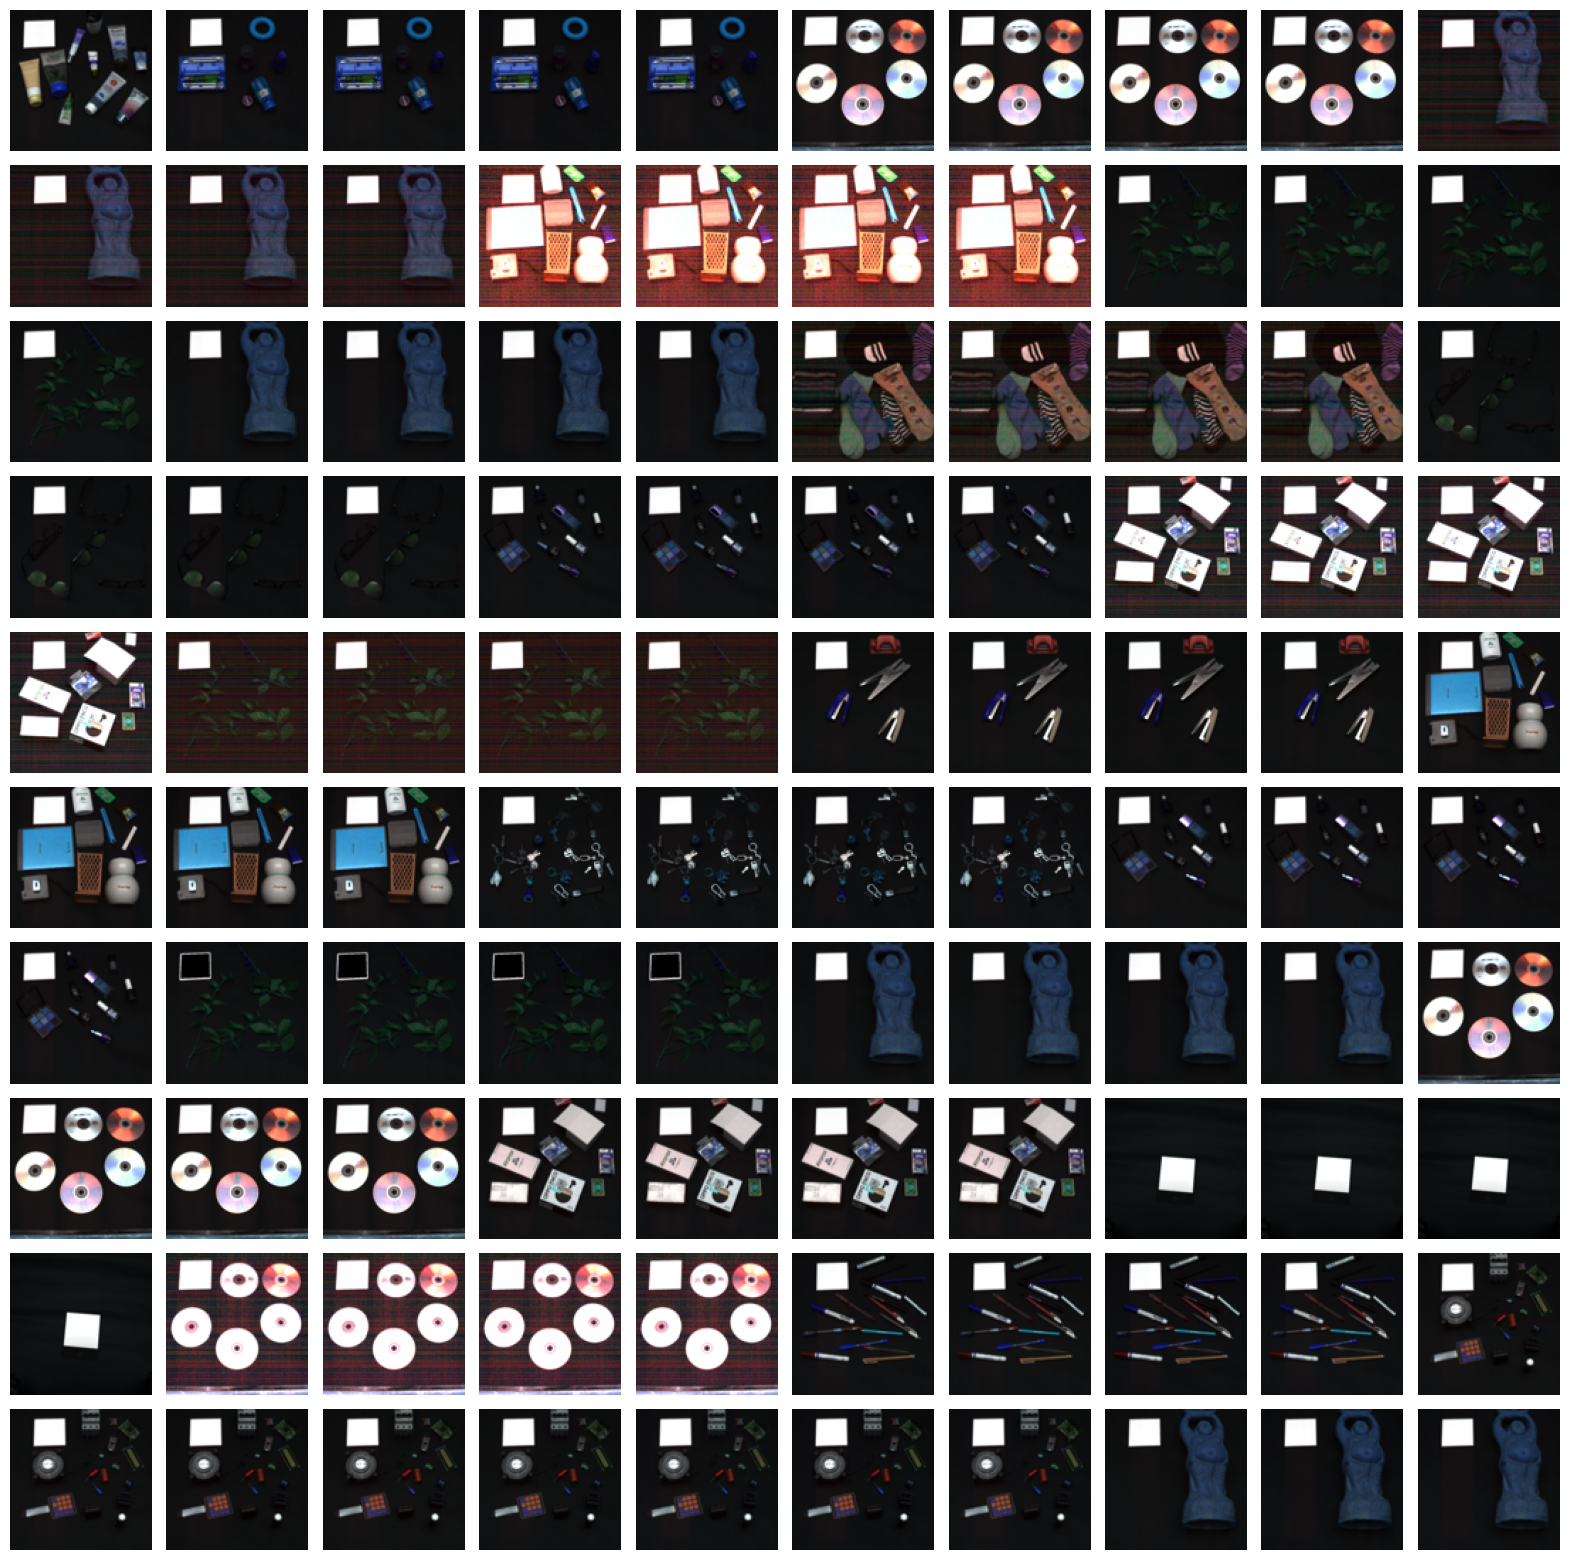

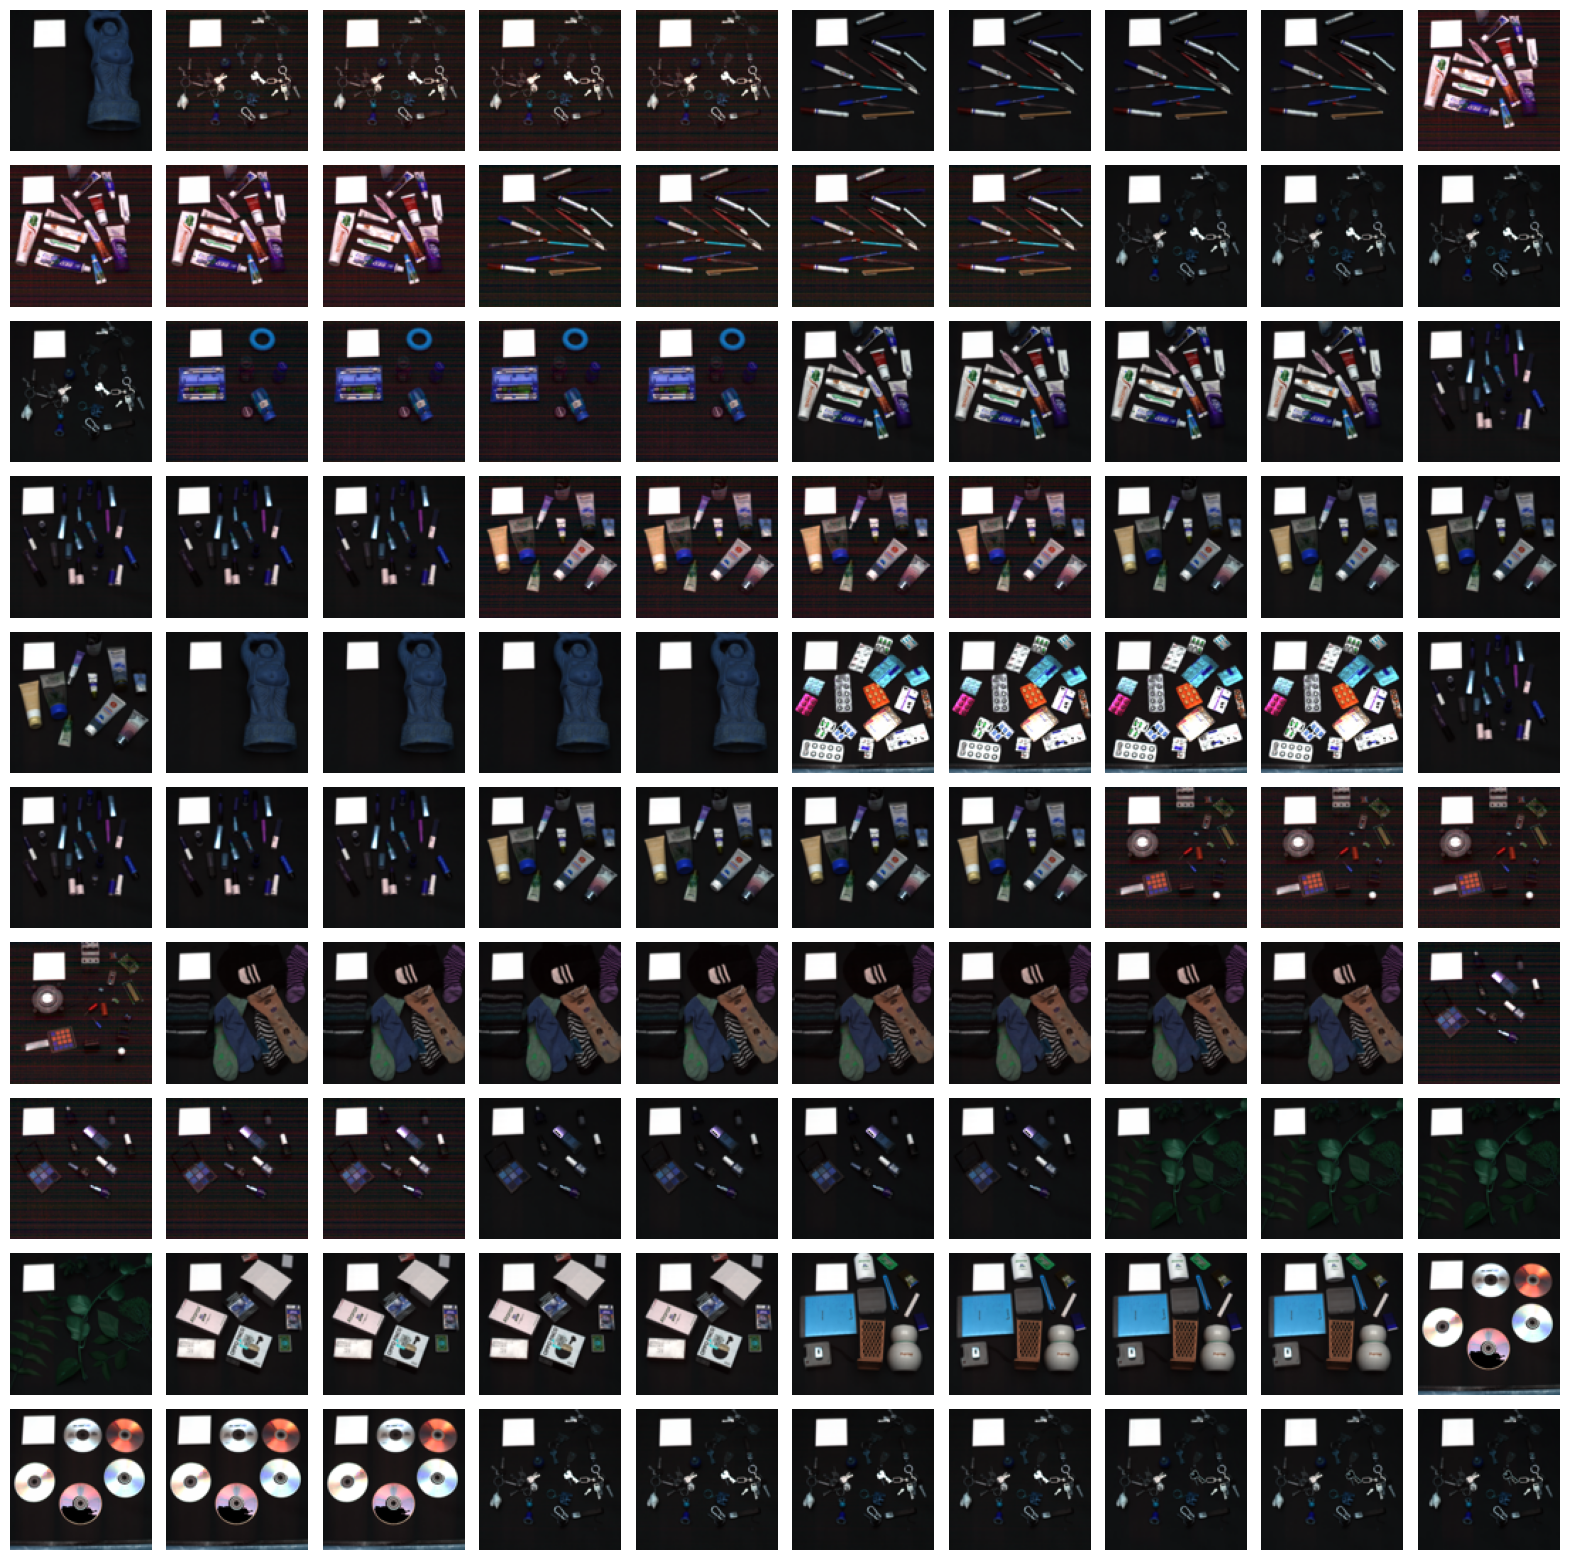

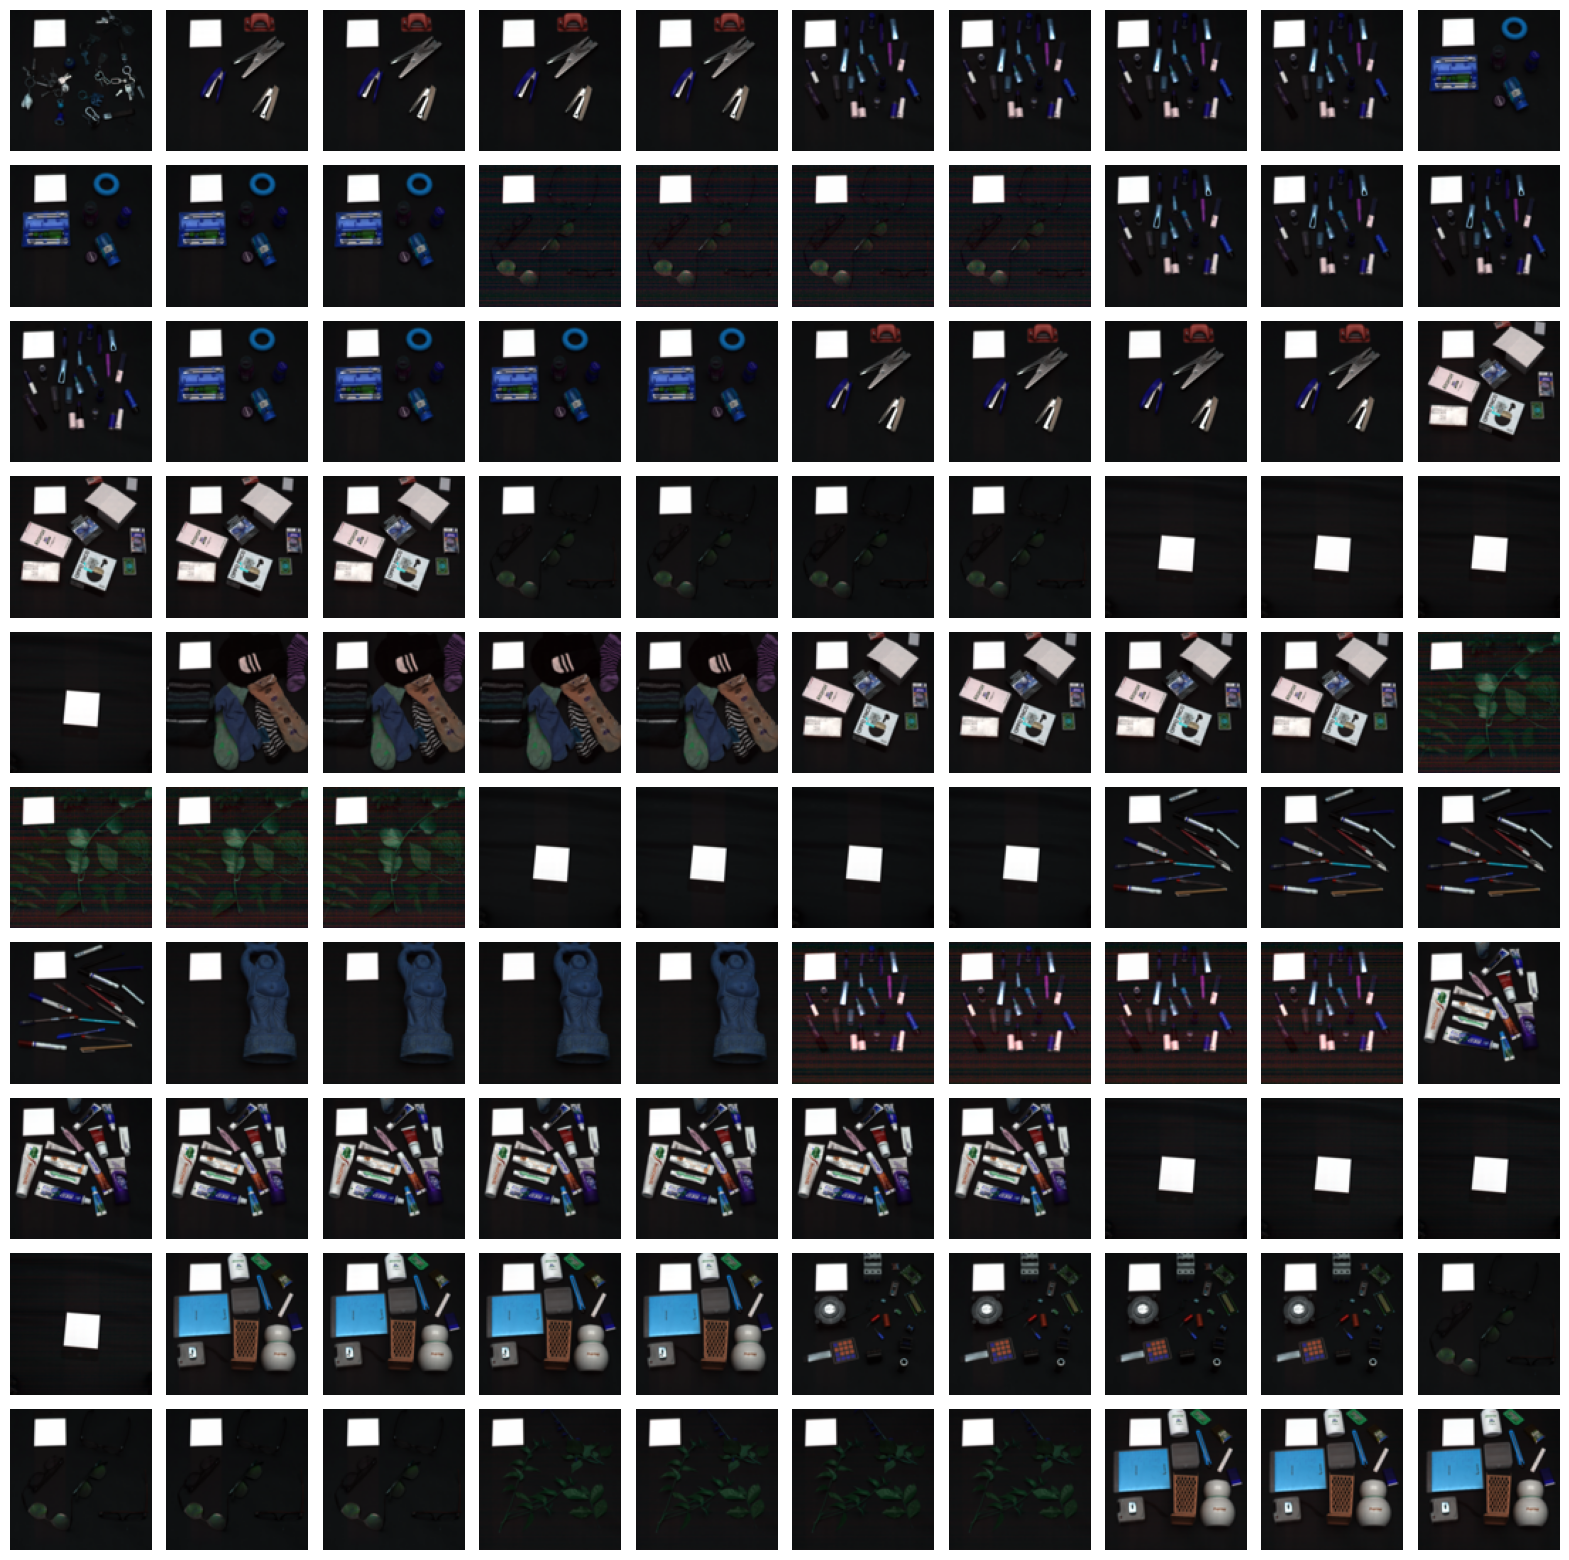

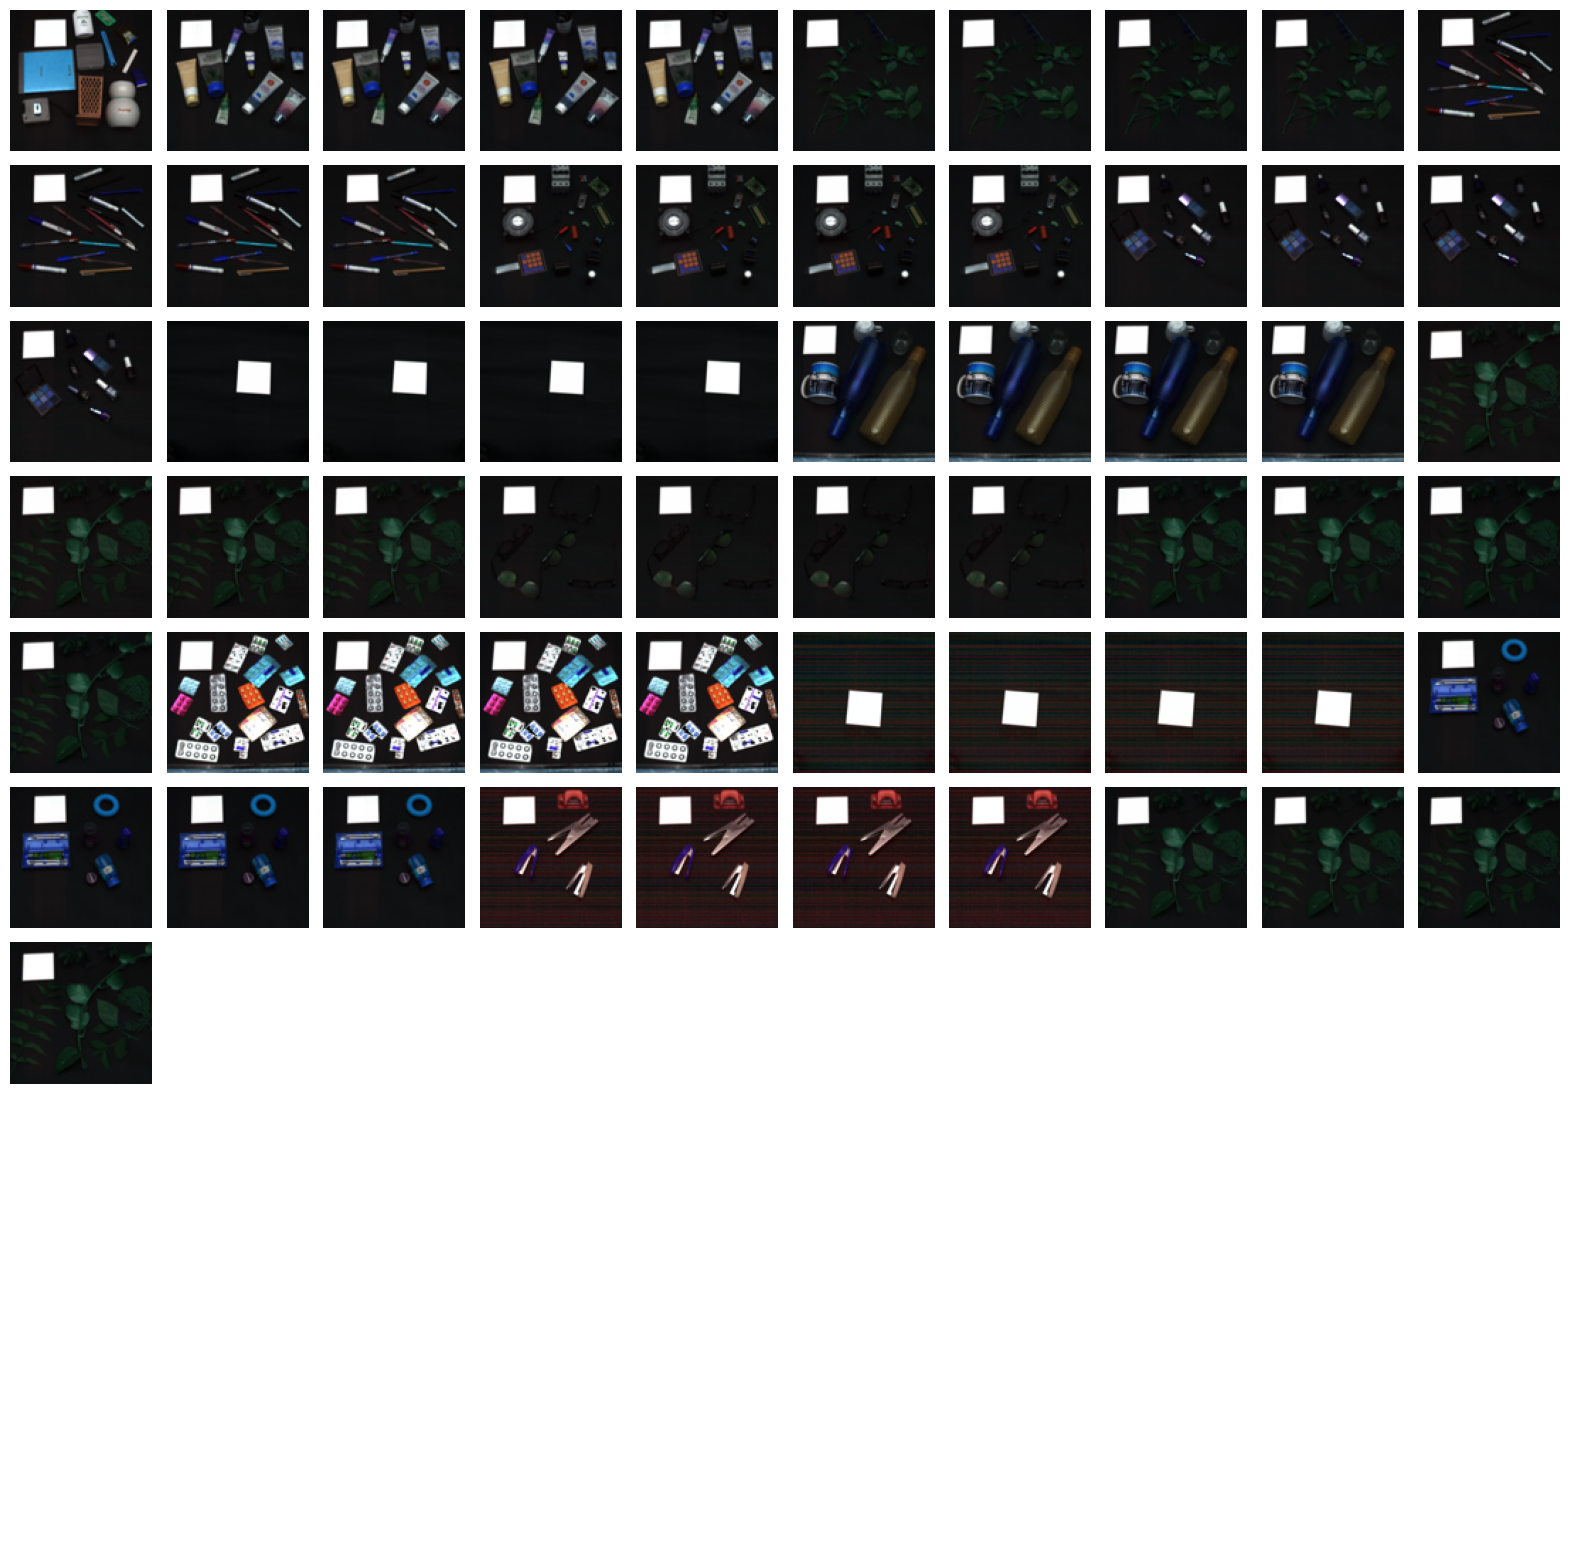

In [ ]:
# from google.colab import drive

# # Mount Google Drive to access files
# drive.mount('/content/drive')

import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Define the folder containing the images
folder_path = "/content/drive/MyDrive/19EC39030_MTP_results"

# Load all PNG images from the folder
images = []
for filename in os.listdir(folder_path):
    if filename.endswith(".png"):
        image_path = os.path.join(folder_path, filename)
        image = Image.open(image_path)
        images.append(image)

# Resize the images to a smaller size
resize_width = 100  # Adjust the size as needed
resize_height = 100  # Adjust the size as needed
resized_images = [image.resize((resize_width, resize_height)) for image in images]

# Calculate the number of rows and columns for each grid
num_rows = 10
num_cols = 10
num_images_per_grid = num_rows * num_cols

# Create and display grids
for i in range(0, len(resized_images), num_images_per_grid):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
    for j, ax in enumerate(axes.flat):
        if i + j < len(resized_images):
            ax.imshow(resized_images[i + j])
        ax.axis('off')
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()


In [ ]:
import os
import numpy as np
from PIL import Image

# model_name = model_names[i]  # Get the model name for the current image
image = Image.fromarray((img_upscaled).astype(np.uint8))  # Convert array to PIL image
filename = f"super_res_image.png"  # Define the filename with the model name
image_path = os.path.join(output_folder, filename)  # Construct the full path to save the image
image.save(image_path)

In [ ]:
!pip install torch torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 66.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 94.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.4 MB/s eta 0:00:00


In [ ]:
!git clone https://github.com/zhangqianhui/AdaptedESRGAN.git

Cloning into 'srgan_repository'...
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
import torch
from PIL import Image
from torchvision.transforms import ToTensor, ToPILImage
import RRDBNet_arch as arch  # Assuming the model architecture is defined in 'models.py'

# Load pre-trained model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = arch.RRDBNet(3, 3, 64, 23, gc=32)
model.load_state_dict(torch.load('path/to/pretrained_model.pth', map_location=device)['model'])
model.eval()
model = model.to(device)

# Load low-resolution input image
input_image = Image.open('path/to/low_resolution_image.jpg').convert('RGB')

# Convert input image to tensor and normalize
input_tensor = ToTensor()(input_image).unsqueeze(0).to(device)

# Perform super-resolution inference
with torch.no_grad():
    output_tensor = model(input_tensor).clamp(0, 1)

# Convert output tensor to PIL image
output_image = ToPILImage()(output_tensor.squeeze(0).cpu())

# Save or display the output image
output_image.save('output_super_resolution_image.jpg')  # Save the output image
output_image.show()  # Display the output image


FileNotFoundError: [Errno 2] No such file or directory: 'path/to/pretrained_model.pth'

In [ ]:
ls

figures/  LR/      net_interp.py  README.md  RRDBNet_arch.py  transer_RRDB_models.py
LICENSE   models/  QA.md          results/   test.py


In [ ]:
!git clone https://github.com/zhangqianhui/AdaptedESRGAN.git

Cloning into 'AdaptedESRGAN'...
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
import sys
sys.path.append('AdaptedESRGAN')

In [ ]:
ls

016.hdr  ESRGAN/  sample_data/


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size, stride, padding)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        residual = x
        out = self.relu(self.conv1(x))
        out = self.conv2(out)
        out += residual
        return out

class Generator(nn.Module):
    def __init__(self, num_residual_blocks=16):
        super(Generator, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=9, stride=1, padding=4)
        self.relu = nn.ReLU(inplace=True)
        self.residual_blocks = nn.Sequential(*[ResidualBlock(64, 64) for _ in range(num_residual_blocks)])
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.bn = nn.BatchNorm2d(64)
        self.upsample = nn.Sequential(
            nn.Conv2d(64, 256, kernel_size=3, stride=1, padding=1),
            nn.PixelShuffle(2),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 256, kernel_size=3, stride=1, padding=1),
            nn.PixelShuffle(2),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 3, kernel_size=9, stride=1, padding=4),
            nn.Tanh()
        )

    def forward(self, x):
        out1 = self.relu(self.conv1(x))
        out = self.residual_blocks(out1)
        out2 = self.bn(self.conv2(out))
        out = torch.add(out1, out2)
        out = self.upsample(out)
        return out


In [ ]:
!git clone https://github.com/junjun-jiang/US3RN.git

Cloning into 'US3RN'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 122 (delta 0), reused 0 (delta 0), pack-reused 119
Receiving objects: 100% (122/122), 3.01 MiB | 6.75 MiB/s, done.
Resolving deltas: 100% (51/51), done.


SyntaxError: invalid syntax (<ipython-input-8-3b8dda52fc41>, line 1)